#include<sys/types.h><br/>
#include<sys/socket.h><br/>
int socket(int domain, int type, int protocol);<br/>

**domain**

|名称|含义|
|-:|-:|
|PF_UNIX,PF_LOCAL,AF_UNIX,AF_LOCAL|本地通信|
|AF_INET,PF_INET|IPv4 Internet协议|
|PF_INET6|IPv6 Internet协议|
|PF_IPX	|IPX-Novell协议|
|PF_NETLINK	|内核用户界面设备|
|PF_X25|ITU-T X25 / ISO-8208协议|
|PF_AX25|Amateur radio AX.25|
|PF_ATMPVC|原始ATM PVC访问|
|PF_APPLETALK|Appletalk|
|PF_PACKET}底层包访问|

**type**

|名称|含义|
|---:|---:|
|SOCK_STREAM|	Tcp连接，提供序列化的、可靠的、双向连接的字节流。支持带外数据传输|
|SOCK_DGRAM|	支持UDP连接（无连接状态的消息）|
|SOCK_SEQPACKET|	序列化包，提供一个序列化的、可靠的、双向的基本连接的数据传输通道，数据长度定常。每次调用读系统调用时数据需要将全部数据读出|
|SOCK_RAW|	RAW类型，提供原始网络协议访问|
|SOCK_RDM|	提供可靠的数据报文，不过可能数据会有乱序|
|SOCK_PACKET|	这是一个专用类型，它直接从设备驱动接受数据|

并不是所有的协议族都实现了这些协议类型，例如，AF_INET协议族就没有实现SOCK_SEQPACKET协议类型。<br/>

**protocol**

函数socket()的第3个参数protocol用于制定某个协议的特定类型，即type类型中的某个类型。通常某协议中只有一种特定类型，这样protocol参数仅能设置为0；但是有些协议有多种特定的类型，就需要设置这个参数来选择特定的类型。

**sockaddr**<br/>
struct sockaddr {<br/>
unsigned  short  sa_family;     //address family, AF_xxx <br/>
char  sa_data[14];                 // 14 bytes of protocol address <br/>
};<br/>

**sockaddr_in**<br/>
struct  sockaddr_in {<br/>
short  int  sin_family;                      // Address family <br/>
unsigned  short  int  sin_port;       // Port number <br/>
struct  in_addr  sin_addr;              // Internet address <br/>
unsigned  char  sin_zero[8];         // Same size as struct sockaddr<br/>
};<br/>
struct  in_addr {<br/>
unsigned  long  s_addr;<br/>
};<br/>

**sockaddr_un**<br/>
struct sockaddr_un {<br/>
unsigned  short  sun_family;     //address family, PF_UNIX,PF_LOCAL,AF_UNIX,AF_LOCAL <br/>
char sun_path[108];    // pathname<br/>
};<br/>

端口port：

系统端口号：0~1023

|应用层协议|FTP|TELNET|SMTP|DNS|TFTP|HTTP|SNMP|
|-:|-:|-:|-:|-:|-:|-:|-:|
|系统端口号|21|23|25|53|69|80|161|

# 一、TCP

TCP报文段结构：

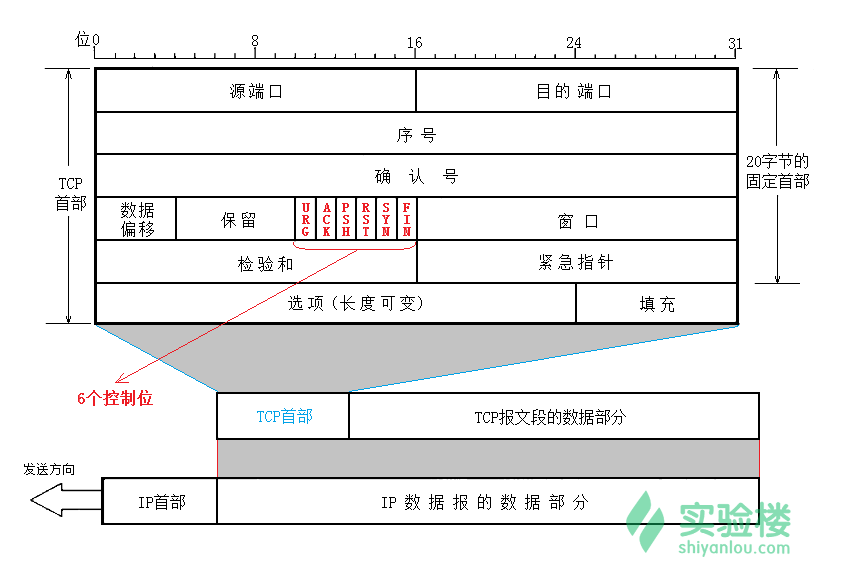

6个控制位意义：

**URG 紧急**:当 URG=1 时，它告诉系统此报文中有紧急数据，应优先传送(比如紧急关闭)，这要与**紧急指针**字段配合使用。<br/>
**ACK 确认**:仅当 ACK=1 时**确认号**字段才有效。建立 TCP 连接后，所有报文段都必须把 ACK 字段置为 1。<br/>
**PSH 推送**:若 TCP 连接的一端希望另一端立即响应，PSH 字段便可以“催促”对方，不再等到缓存区填满才发送。<br/>
**RST复位**:若 TCP 连接出现严重差错，RST 置为 1，断开 TCP 连接，再重新建立连接。<br/>
**SYN 同步**:用于建立和释放连接。<br/>
**FIN 终止**:用于释放连接，当 FIN=1，表明发送方已经发送完毕，要求释放 TCP 连接。<br/>

3次握手：

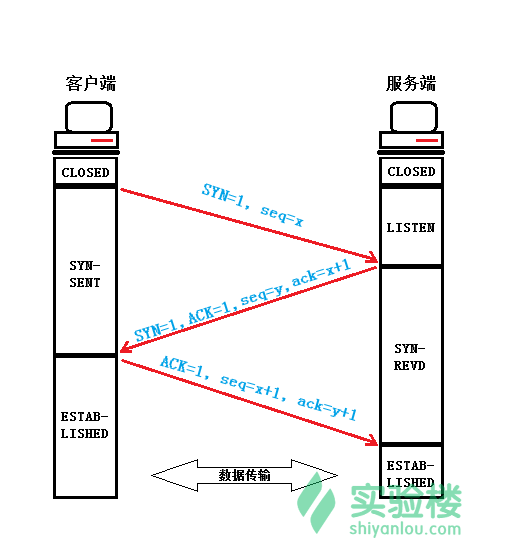

4次挥手：

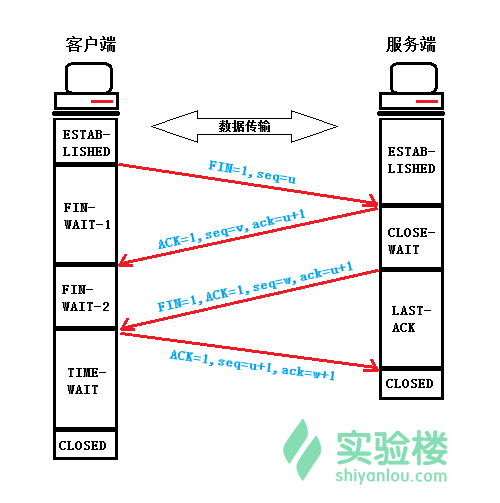

**TCP三次握手原理，你真的理解吗？**

![](./Socket/queue.jpg)

https://mp.weixin.qq.com/s?__biz=MzIzOTU0NTQ0MA==&mid=2247487779&idx=1&sn=0980243dcec05c5df8e2e60937c2c5ed&chksm=e9292c2cde5ea53a7b309e3575c78940a378b358292a3badb828d6c9bb6e8d3997800564b1d5&mpshare=1&scene=24&srcid=0712CuKf7Fhq2T5QJ0ZcUzTf&pass_ticket=%2B5vUk%2F%2F6hjIO7AMDB8N15LRvAkXRttLoGYYwZuS4hfY%2BTvMsgb5RZctf5%2BaRc1WC#rd

# 二、UDP

UDP报文段结构：

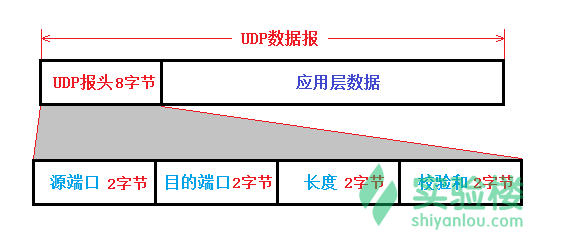

1.对等模式<br/>
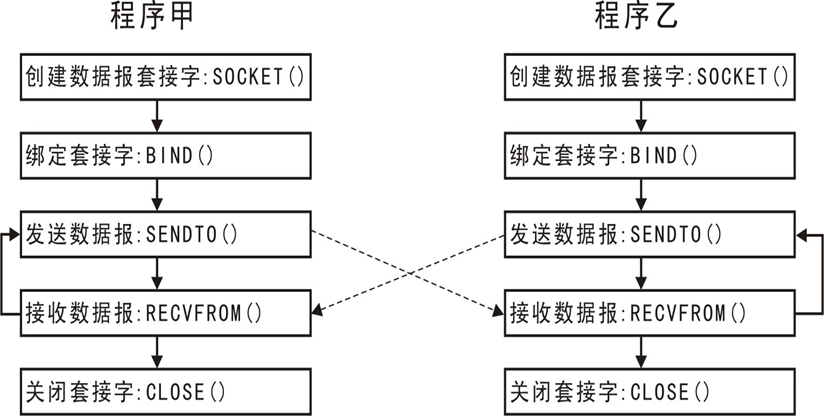

2.客户端/服务端模式<br/>
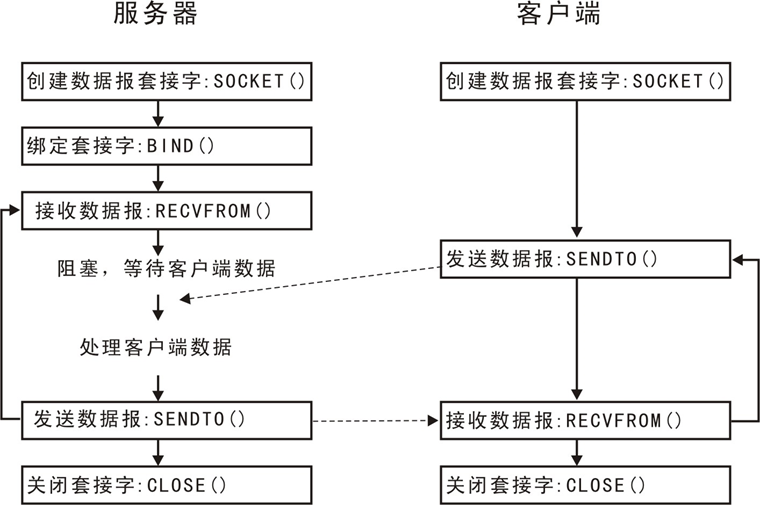

# 三、SCTP

4次握手：

![](./Socket/SCTP1.png)

3次挥手：

![](./Socket/SCTP2.png)

参考：https://blog.csdn.net/scutzxb_2/article/details/52717392

# 四、RAW

应用原始套接字,我们可以编写出由TCP和UDP套接字不能够实现的功能. <br/>
注意原始套接字只能够由有root权限的人创建. <br/>

**int sockfd(AF_INET,SOCK_RAW,protocol)**<br/>
protocol可以是：<br/>
IPPROTO_ICMP<br/>
IPPROTO_TCP<br/>
IPPROTO_UDP<br/>

# 五、IP

IP数据包格式：

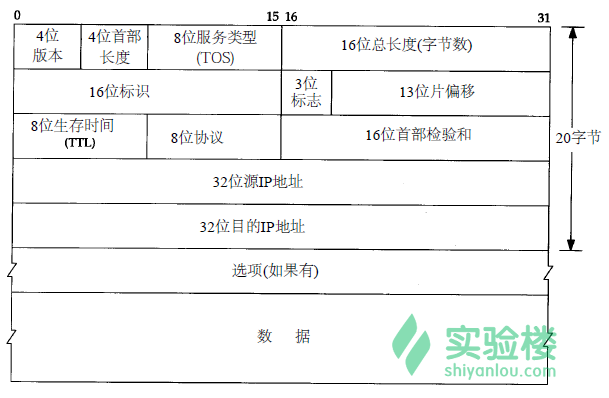

# 六、ICMP

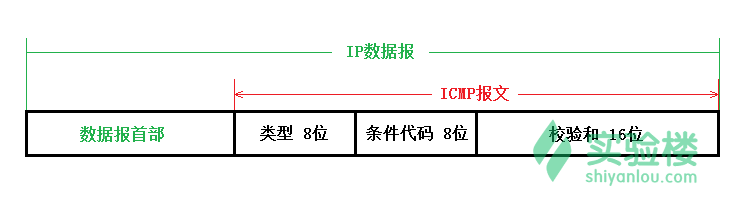

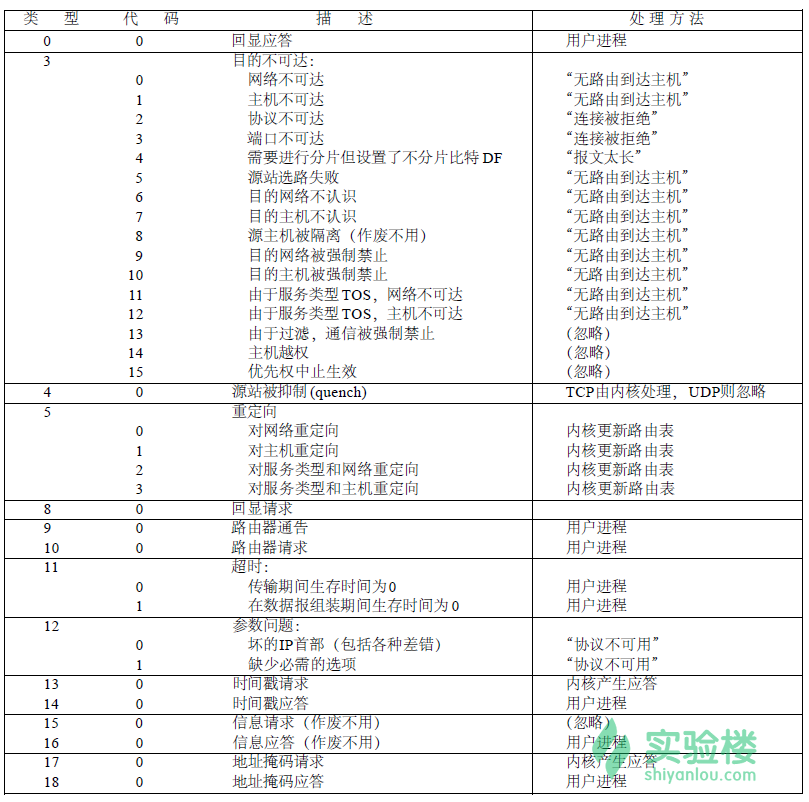

# 七、UDS

socket API原本是为网络通讯设计的，但后来在socket的框架上发展出一种IPC机制，就是UNIX Domain Socket。虽然网络socket也可用于同一台主机的进程间通讯（通过loopback地址127.0.0.1），但是UNIX Domain Socket用于IPC更有效率：不需要经过网络协议栈，不需要打包拆包、计算校验和、维护序号和应答等，只是将应用层数据从一个进程拷贝到另一个进程。 这是因为，IPC机制本质上是可靠的通讯，而网络协议是为不可靠的通讯设计的。UNIX Domain Socket也提供面向流和面向数据包两种API接口，类似于TCP和UDP，但是面向消息的UNIX Domain Socket也是可靠的，消息既不会丢失也不会顺序错乱。

而且UDS也可以避免为黑客留下后门。

UNIX Domain Socket是全双工的，API接口语义丰富，相比其它IPC机制有明显的优越性，目前已成为使用最广泛的IPC机制，比如X Window服务器和GUI程序之间就是通过UNIX Domain Socket通讯的。

使 用UNIX Domain Socket的过程和网络socket十分相似，也要先调用socket()创建一个socket文件描述符，address family指定为AF_UNIX，type可以选择SOCK_DGRAM或SOCK_STREAM，protocol参数仍然指定为0即可。

UNIX Domain Socket与网络socket编程最明显的不同在于地址格式不同，用结构体sockaddr_un表示，网络编程的socket地址是IP地址加端口 号，而UNIX Domain Socket的地址是一个socket类型的文件在文件系统中的路径，这个socket文件由bind()调用创建，如果调用bind()时该文件已存 在，则bind()错误返回。

以下程序将UNIX Domain socket绑定到一个地址:
```
#include <stdlib.h>
#include <stdio.h>
#include <stddef.h>
#include <sys/socket.h>
#include <sys/un.h>
int main(void)
{
	int fd, size, size2;
	struct sockaddr_un un;
	memset(&un, 0, sizeof(un));
	un.sun_family = AF_UNIX;
	strcpy(un.sun_path, "foo.socket");
	if ((fd = socket(AF_UNIX, SOCK_STREAM, 0)) < 0) 
	{
		perror("socket error");
		exit(1);
	}
	size = sizeof(struct sockaddr_un);//包含sun_path整个数组
	size2 = offsetof(struct sockaddr_un, sun_path) + strlen(un.sun_path);//包含sun_path数组赋值为foo.socket的部分
	if (bind(fd, (struct sockaddr *)&un, size) < 0) 
	{
		perror("bind error");
		exit(1);
	}
	printf("UNIX domain socket bound\n");
	unlink(un.sun_path);//delete the file
	exit(0);
}
```

注意程序中的offsetof宏，它在stddef.h头文件中定义：<br/>

 #define offsetof(TYPE, MEMBER) ((int)&((TYPE *)0)->MEMBER)<br/>


offsetof(struct sockaddr_un, sun_path)就是取sockaddr_un结构体的sun_path成员在结构体中的偏移，也就是从结构体的第几个字节开始是sun_path成员。想一想，这个宏是如何实现这一功能的？(先将TYPE类型的指针首地址设为0，然后取MEMBER成员的地址就是该成员在TYPE中的偏移数。)

# 八、套接字选项

**int getsockopt(int sockfd,int level,int optname,void *optval,socklen_t *optlen)**<br/>
**int setsockopt(int sockfd,int level,int optname,const void *optval,socklen_t *optlen)**<br/>
系统为我们提供了获取和修改套接字结构中一些属性的函数，通过修改这些属性，我们可以调整套接字的性能，进而调整某些应用程序的性能。<br/>
level指定控制套接字的层次.可以取三种值:<br/>
1.SOL_SOCKET:通用套接字选项.<br/>
2.IPPROTO_IP:IP选项.<br/>
3.IPPROTO_TCP:TCP选项. <br/>
optname指定控制的方式(选项的名称)。<br/>
optval获得或者是设置套接字选项.根据选项名称的数据类型进行转换 。<br/>


![](./Socket/SOL_SOCKET.PNG)<br/>

![](./Socket/IPPROTO_IP_TCP.PNG)<br/>

# 九、常用Linux网络相关命令

1.netstat -in 查看网络接口MTU

2.traceroute github.com 查看到目标地址所经过的路由IP

3.tcpdump<br/>
Eg:tcpdump -s 0 -i eth1 -w /ram/111.pcap &  抓取网卡eth1的数据包并保存<br/>
Eg:tcpdump -s 0 -i any -w /ram/111.pcap &  抓取所有网卡的数据包并保存<br/>
Eg:tcpdump -s 0 -n 192.168.253.20 -w /ram/111.pcap &  抓取该IP地址的数据包并保存

4.host github.com 进行DNS查询，获取指定域名IP地址

5.telnet IP地址 Port端口  可以测试目标主机的TCP端口是否开放<br/>
可以用netstat -pantu验证端口使用情况（LISTEN说明为开放状态）

6.Linux系统网络功能重启：<br/>
systemctl restart network.service

7.网卡配置命令：ip，ifconfig的升级版<br/>
(1).添加IP地址<br/>
	ip addr add 192.168.56.200/24 dev enp0s3 label enp0s3:0<br/>
(2).显示网卡对应IP地址<br/>
	ip addr show enp0s3<br/>
(3).删除IP地址<br/>
	ip addr del 192.168.56.200/24 dev enp0s3 label enp0s3:0<br/>
(4).激活和停止网络接口<br/>
	ip link set enp0s8 down/up<br/>

8.显示网络状态信息命令：ss， netstat的升级版<br/>
(1).显示TCP连接<br/>
	ss -t<br/>
(2).显示所有listening的网络端口<br/>
	ss -l<br/>

9.管理路由表:ip route<br/>
(1).列出路由条目<br/>
	ip route show<br/>

10.显示网络统计信息：<br/>
ip -s link

# Reference

1.实验楼：TCP/IP网络协议基础